In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/player-scores/players.csv
/kaggle/input/player-scores/competitions.csv
/kaggle/input/player-scores/games.csv
/kaggle/input/player-scores/transfers.csv
/kaggle/input/player-scores/game_events.csv
/kaggle/input/player-scores/club_games.csv
/kaggle/input/player-scores/player_valuations.csv
/kaggle/input/player-scores/game_lineups.csv
/kaggle/input/player-scores/appearances.csv
/kaggle/input/player-scores/clubs.csv


In [3]:
df_clubs = pd.read_csv("/kaggle/input/player-scores/clubs.csv")

In [4]:
df_clubs.sort_values(by="net_transfer_record", ascending=False)

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
213,379,west-ham-united,West Ham United Football Club,GB1,NaN,23,28.4,17,73.9,12,London Stadium,62500,€-99.65m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/west-ham-unite...
239,583,fc-paris-saint-germain,Paris Saint-Germain Football Club,FR1,NaN,26,23.3,15,57.7,19,Parc des Princes,48583,€-98.42m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/fc-paris-saint...
20,3690,ska-khabarovsk,SKA Khabarovsk,RU1,NaN,27,25.7,4,14.8,0,Lenin Stadion,15200,€-93k,NaN,2017,../data/raw/transfermarkt-scraper/2017/clubs.j...,https://www.transfermarkt.co.uk/ska-khabarovsk...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,25,25.2,18,72.0,16,Tottenham Hotspur Stadium,62850,€-93.55m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...
65,13,atletico-madrid,Club Atlético de Madrid S.A.D.,ES1,NaN,24,28.0,16,66.7,17,Civitas Metropolitano,70460,€-91.10m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/atletico-madri...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,2861,kv-oostende,KV Oostende,BE1,NaN,26,23.3,14,50.0,2,Diaz Arena,8432,+-0,NaN,2022,../data/raw/transfermarkt-scraper/2022/clubs.j...,https://www.transfermarkt.co.uk/kv-oostende/st...
349,6894,kayseri-erciyesspor,Kayseri Erciyesspor,TR1,NaN,0,NaN,0,NaN,0,Kayseri Atatürk Spor Kompleksi Yan Açık Saha,2000,+-0,NaN,2014,../data/raw/transfermarkt-scraper/2014/clubs.j...,https://www.transfermarkt.co.uk/kayseri-erciye...
110,47,iraklis-thessaloniki,Iraklis Thessaloniki,GR1,NaN,27,24.3,9,33.3,0,Kaftanzoglio Stadio,27770,+-0,NaN,2016,../data/raw/transfermarkt-scraper/2016/clubs.j...,https://www.transfermarkt.co.uk/iraklis-thessa...
111,4750,sc-olhanense,SC Olhanense,PO1,NaN,10,23.4,5,50.0,0,Estádio José Arcanjo,10080,+-0,NaN,2013,../data/raw/transfermarkt-scraper/2013/clubs.j...,https://www.transfermarkt.co.uk/sc-olhanense/s...


In [5]:
df_club_v1 = df_clubs.drop(["coach_name"], axis=1)
df_club_v1

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,filename,url
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,NaN,27,25.6,13,48.1,1,Merck-Stadion am Böllenfalltor,17810,+€3.05m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,NaN,30,26.5,11,36.7,3,Yekaterinburg Arena,23000,+€880k,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,35,25.7,18,51.4,12,Tüpraş Stadyumu,42445,€-18.65m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,24,26.4,18,75.0,18,Olimpico di Roma,73261,€-64.10m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,25,25.2,18,72.0,16,Tottenham Hotspur Stadium,62850,€-93.55m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,724,fc-volendam,FC Volendam,NL1,NaN,25,23.4,6,24.0,2,Kras Stadion,7384,+€800k,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-volendam/st...
435,800,atalanta-bergamo,Atalanta Bergamasca Calcio S.p.a.,IT1,NaN,26,26.8,15,57.7,20,Gewiss Stadium,21747,+€18.05m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/atalanta-berga...
436,85465,karpaty-lviv-2020-,FK Karpaty Lviv,UKR1,NaN,30,24.4,6,20.0,1,Ukraina,28051,€-1.48m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/karpaty-lviv-2...
437,979,moreirense-fc,Moreirense Futebol Clube,PO1,NaN,24,25.8,16,66.7,3,Estádio C. J. de Almeida Freitas,6150,+€2.10m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/moreirense-fc/...


In [6]:
df_club_v1.drop("total_market_value", axis=1, inplace=True)
df_club_v1

,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,filename,url
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,27,25.6,13,48.1,1,Merck-Stadion am Böllenfalltor,17810,+€3.05m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,30,26.5,11,36.7,3,Yekaterinburg Arena,23000,+€880k,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,35,25.7,18,51.4,12,Tüpraş Stadyumu,42445,€-18.65m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,24,26.4,18,75.0,18,Olimpico di Roma,73261,€-64.10m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,25,25.2,18,72.0,16,Tottenham Hotspur Stadium,62850,€-93.55m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,724,fc-volendam,FC Volendam,NL1,25,23.4,6,24.0,2,Kras Stadion,7384,+€800k,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-volendam/st...
435,800,atalanta-bergamo,Atalanta Bergamasca Calcio S.p.a.,IT1,26,26.8,15,57.7,20,Gewiss Stadium,21747,+€18.05m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/atalanta-berga...
436,85465,karpaty-lviv-2020-,FK Karpaty Lviv,UKR1,30,24.4,6,20.0,1,Ukraina,28051,€-1.48m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/karpaty-lviv-2...
437,979,moreirense-fc,Moreirense Futebol Clube,PO1,24,25.8,16,66.7,3,Estádio C. J. de Almeida Freitas,6150,+€2.10m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/moreirense-fc/...


In [7]:
df_club_v1.sort_values("club_id", ascending=True)

,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,filename,url
310,3,1-fc-koln,1.FC Köln,L1,34,24.6,11,32.4,6,RheinEnergieSTADION,50000,+€1.60m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/1-fc-koln/star...
47,4,1-fc-nurnberg,1.FC Nuremberg,L1,33,25.2,7,21.2,2,Max-Morlock-Stadion,50000,+€2.63m,2018,../data/raw/transfermarkt-scraper/2018/clubs.j...,https://www.transfermarkt.co.uk/1-fc-nurnberg/...
317,5,ac-mailand,Associazione Calcio Milan,IT1,26,25.2,19,73.1,16,Giuseppe Meazza,75923,€-38.40m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/ac-mailand/sta...
113,6,adanaspor,Adanaspor,TR1,10,23.9,4,40.0,0,Yeni Adana Stadyumu,33000,+-0,2016,../data/raw/transfermarkt-scraper/2016/clubs.j...,https://www.transfermarkt.co.uk/adanaspor/star...
407,10,arminia-bielefeld,Arminia Bielefeld,L1,27,25.3,15,55.6,4,SchücoArena,26515,+€5.90m,2021,../data/raw/transfermarkt-scraper/2021/clubs.j...,https://www.transfermarkt.co.uk/arminia-bielef...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,75231,fk-makhachkala,Dinamo Makhachkala,RU1,27,24.0,8,29.6,3,Anzhi-Arena,24173,€-2.43m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/fk-makhachkala...
58,83678,metal-kharkiv,Metalist Kharkiv,UKR1,25,26.1,7,28.0,0,Avangard,10640,+€300k,2022,../data/raw/transfermarkt-scraper/2022/clubs.j...,https://www.transfermarkt.co.uk/metal-kharkiv/...
436,85465,karpaty-lviv-2020-,FK Karpaty Lviv,UKR1,30,24.4,6,20.0,1,Ukraina,28051,€-1.48m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/karpaty-lviv-2...
172,86209,fk-livyi-bereg,FK Livyi Bereh,UKR1,26,25.9,1,3.8,0,Arena Livyi Bereg,4700,+-0,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/fk-livyi-bereg...


In [8]:
df_club_v1.sort_values(["club_id", "average_age"], ascending=True)

,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,filename,url
310,3,1-fc-koln,1.FC Köln,L1,34,24.6,11,32.4,6,RheinEnergieSTADION,50000,+€1.60m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/1-fc-koln/star...
47,4,1-fc-nurnberg,1.FC Nuremberg,L1,33,25.2,7,21.2,2,Max-Morlock-Stadion,50000,+€2.63m,2018,../data/raw/transfermarkt-scraper/2018/clubs.j...,https://www.transfermarkt.co.uk/1-fc-nurnberg/...
317,5,ac-mailand,Associazione Calcio Milan,IT1,26,25.2,19,73.1,16,Giuseppe Meazza,75923,€-38.40m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/ac-mailand/sta...
113,6,adanaspor,Adanaspor,TR1,10,23.9,4,40.0,0,Yeni Adana Stadyumu,33000,+-0,2016,../data/raw/transfermarkt-scraper/2016/clubs.j...,https://www.transfermarkt.co.uk/adanaspor/star...
407,10,arminia-bielefeld,Arminia Bielefeld,L1,27,25.3,15,55.6,4,SchücoArena,26515,+€5.90m,2021,../data/raw/transfermarkt-scraper/2021/clubs.j...,https://www.transfermarkt.co.uk/arminia-bielef...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,75231,fk-makhachkala,Dinamo Makhachkala,RU1,27,24.0,8,29.6,3,Anzhi-Arena,24173,€-2.43m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/fk-makhachkala...
58,83678,metal-kharkiv,Metalist Kharkiv,UKR1,25,26.1,7,28.0,0,Avangard,10640,+€300k,2022,../data/raw/transfermarkt-scraper/2022/clubs.j...,https://www.transfermarkt.co.uk/metal-kharkiv/...
436,85465,karpaty-lviv-2020-,FK Karpaty Lviv,UKR1,30,24.4,6,20.0,1,Ukraina,28051,€-1.48m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/karpaty-lviv-2...
172,86209,fk-livyi-bereg,FK Livyi Bereh,UKR1,26,25.9,1,3.8,0,Arena Livyi Bereg,4700,+-0,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/fk-livyi-bereg...


Text(0, 0.5, 'value_counts')

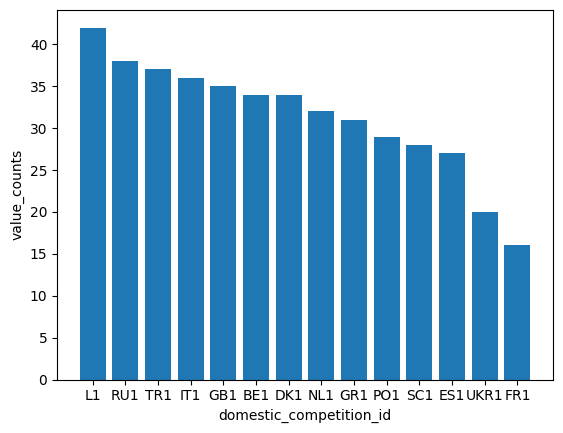

In [9]:
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.bar(x=df_club_v1["domestic_competition_id"].unique(), height=df_club_v1["domestic_competition_id"].value_counts().tolist())
plt.pyplot.ylim(0,)
plt.pyplot.xlabel("domestic_competition_id")
plt.pyplot.ylabel("value_counts")

In [10]:
df_club_v1.sort_values(["national_team_players"], ascending=True)

,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,filename,url
175,1084,fc-malaga,Málaga CF,ES1,27,27.9,8,29.6,0,La Rosaleda,30044,+€950k,2017,../data/raw/transfermarkt-scraper/2017/clubs.j...,https://www.transfermarkt.co.uk/fc-malaga/star...
82,5220,gs-ergotelis,GS Ergotelis,GR1,3,23.3,0,NaN,0,Pankritio Stadio,25780,+-0,2014,../data/raw/transfermarkt-scraper/2014/clubs.j...,https://www.transfermarkt.co.uk/gs-ergotelis/s...
325,897,deportivo-la-coruna,Deportivo de La Coruña,ES1,24,27.7,3,12.5,0,Abanca Riazor,32912,€-435k,2017,../data/raw/transfermarkt-scraper/2017/clubs.j...,https://www.transfermarkt.co.uk/deportivo-la-c...
328,1085,vitoria-setubal-fc,Vitória Setúbal FC,PO1,29,26.0,10,34.5,0,Estádio do Bonfim,18642,+-0,2019,../data/raw/transfermarkt-scraper/2019/clubs.j...,https://www.transfermarkt.co.uk/vitoria-setuba...
331,1627,catania-calcio,Catania FC,IT1,27,26.0,5,18.5,0,Cibali - Angelo Massimino,20204,€-101k,2013,../data/raw/transfermarkt-scraper/2013/clubs.j...,https://www.transfermarkt.co.uk/catania-calcio...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,46,inter-mailand,Football Club Internazionale Milano S.p.A.,IT1,27,28.2,19,70.4,19,Giuseppe Meazza,75923,€-56.70m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/inter-mailand/...
249,985,manchester-united,Manchester United Football Club,GB1,27,25.9,19,70.4,19,Old Trafford,74879,€-111.50m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/manchester-uni...
415,27,fc-bayern-munchen,FC Bayern München,L1,29,25.6,17,58.6,20,Allianz Arena,75024,€-67.65m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/fc-bayern-munc...
435,800,atalanta-bergamo,Atalanta Bergamasca Calcio S.p.a.,IT1,26,26.8,15,57.7,20,Gewiss Stadium,21747,+€18.05m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/atalanta-berga...


<Axes: xlabel='squad_size', ylabel='average_age'>

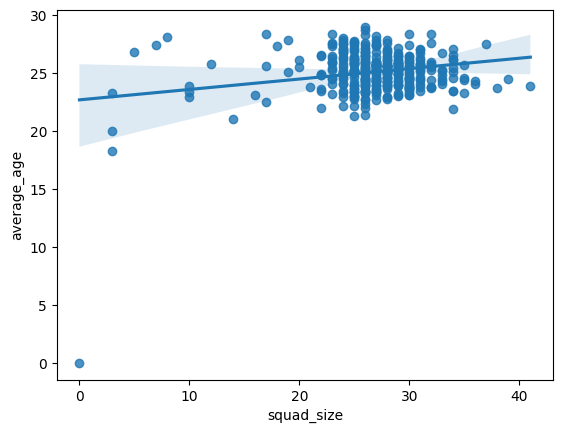

In [11]:
import seaborn as sns
sns.regplot(x="squad_size", y="average_age", data=df_club_v1)

In [12]:
df_club_v1["average_age"]

0      25.6
1      26.5
2      25.7
3      26.4
4      25.2
       ... 
434    23.4
435    26.8
436    24.4
437    25.8
438    27.8
Name: average_age, Length: 439, dtype: float64

In [13]:
# from scipy import stats
# pearson_coef, p_value = stats.pearsonr(df_club_v1["squad_size"], df_club_v1["average_age"])
# pearson_coef, p_value

In [14]:
df_club_v1["net_transfer_record_value"] = df_club_v1["net_transfer_record"][2:-2]

In [15]:
df_club_v1

,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,filename,url,net_transfer_record_value
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,27,25.6,13,48.1,1,Merck-Stadion am Böllenfalltor,17810,+€3.05m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...,NaN
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,30,26.5,11,36.7,3,Yekaterinburg Arena,23000,+€880k,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...,NaN
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,35,25.7,18,51.4,12,Tüpraş Stadyumu,42445,€-18.65m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...,€-18.65m
3,12,as-rom,Associazione Sportiva Roma,IT1,24,26.4,18,75.0,18,Olimpico di Roma,73261,€-64.10m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...,€-64.10m
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,25,25.2,18,72.0,16,Tottenham Hotspur Stadium,62850,€-93.55m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...,€-93.55m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,724,fc-volendam,FC Volendam,NL1,25,23.4,6,24.0,2,Kras Stadion,7384,+€800k,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-volendam/st...,+€800k
435,800,atalanta-bergamo,Atalanta Bergamasca Calcio S.p.a.,IT1,26,26.8,15,57.7,20,Gewiss Stadium,21747,+€18.05m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/atalanta-berga...,+€18.05m
436,85465,karpaty-lviv-2020-,FK Karpaty Lviv,UKR1,30,24.4,6,20.0,1,Ukraina,28051,€-1.48m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/karpaty-lviv-2...,€-1.48m
437,979,moreirense-fc,Moreirense Futebol Clube,PO1,24,25.8,16,66.7,3,Estádio C. J. de Almeida Freitas,6150,+€2.10m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/moreirense-fc/...,NaN


In [16]:
df_test = df_club_v1[["domestic_competition_id", "average_age", "foreigners_percentage"]]
df_groupedby_domestic_id = df_club_v1.groupby(["domestic_competition_id"], as_index=False).agg({"average_age":"mean", "foreigners_percentage":"mean"})
df_groupedby_domestic_id

,domestic_competition_id,average_age,foreigners_percentage
0,BE1,24.172727,57.709091
1,DK1,24.347368,41.078947
2,ES1,26.746875,36.315625
3,FR1,25.022857,52.740000
4,GB1,25.648649,61.278378
5,GR1,25.892308,45.364000
6,IT1,25.418919,50.083784
7,L1,25.245161,46.470968
8,NL1,23.771429,42.732143
9,PO1,25.050000,55.165625


In [17]:
# df_groupedby_domestic_id.sort_values(["average_age", "foreigners_percentage"], ascending=True)
df_groupedby_domestic_id["foreigners_percentage"] = df_groupedby_domestic_id["foreigners_percentage"].astype(int)
df_groupedby_domestic_id["average_age"] = df_groupedby_domestic_id["average_age"].astype(int)
df_groupedby_domestic_id

,domestic_competition_id,average_age,foreigners_percentage
0,BE1,24,57
1,DK1,24,41
2,ES1,26,36
3,FR1,25,52
4,GB1,25,61
5,GR1,25,45
6,IT1,25,50
7,L1,25,46
8,NL1,23,42
9,PO1,25,55


In [18]:
df_test_2 = df_club_v1[["domestic_competition_id", "stadium_seats"]]
df_groupedby_domestic_id2 = df_club_v1.groupby(["domestic_competition_id"], as_index=False).agg({"stadium_seats":"mean"})
df_groupedby_domestic_id2.sort_values("stadium_seats", ascending=False)
df_groupedby_domestic_id2.round({"stadium_seats":0})

,domestic_competition_id,stadium_seats
0,BE1,14175.0
1,DK1,13455.0
2,ES1,31631.0
3,FR1,25717.0
4,GB1,34752.0
5,GR1,15160.0
6,IT1,29713.0
7,L1,39555.0
8,NL1,17540.0
9,PO1,16301.0


In [19]:
df_groupedby_domestic_id2["stadium_seats"] = df_groupedby_domestic_id2["stadium_seats"].astype(int)
df_groupedby_domestic_id2.sort_values("stadium_seats", ascending=False)

,domestic_competition_id,stadium_seats
7,L1,39554
4,GB1,34752
2,ES1,31630
10,RU1,29749
6,IT1,29713
3,FR1,25716
12,TR1,24511
11,SC1,18076
8,NL1,17539
9,PO1,16301


In [20]:
df_national_players = df_club_v1[["domestic_competition_id", "name", "national_team_players"]]
df_national_players = df_national_players.groupby(["domestic_competition_id", "name"], as_index=False).agg({"national_team_players": "sum"})
df_national_players = df_national_players.sort_values(["national_team_players", "name"], ascending=False).head(30)
df_national_players

,domestic_competition_id,name,national_team_players
130,GB1,Liverpool Football Club,22
230,L1,FC Bayern München,20
185,IT1,Atalanta Bergamasca Calcio S.p.a.,20
103,FR1,Paris Saint-Germain Football Club,19
133,GB1,Manchester United Football Club,19
132,GB1,Manchester City Football Club,19
197,IT1,Football Club Internazionale Milano S.p.A.,19
114,GB1,Arsenal Football Club,19
150,GB1,Wolverhampton Wanderers Football Club,18
66,ES1,Real Madrid Club de Fútbol,18


<Axes: xlabel='squad_size', ylabel='national_team_players'>

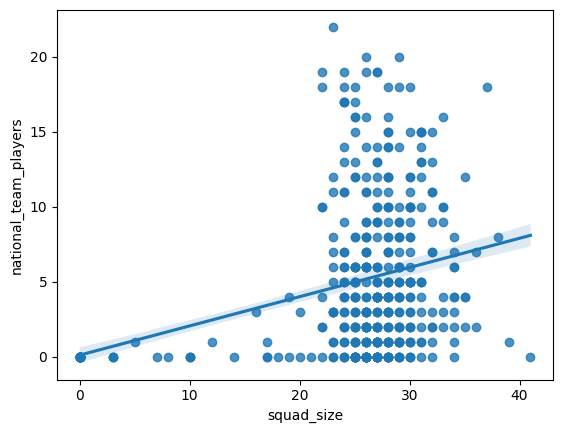

In [21]:
import seaborn as sns
sns.regplot(x="squad_size", y="national_team_players", data=df_club_v1)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 51.69658897257098)

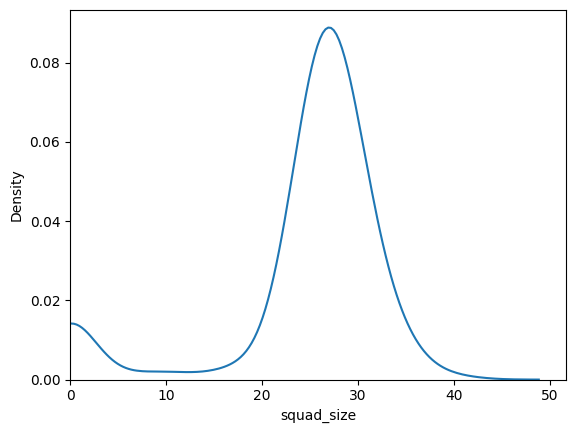

In [22]:
sns.kdeplot(df_club_v1["squad_size"])
plt.pyplot.ylim(0,)
plt.pyplot.xlim(0,)

/tmp/ipykernel_37/2456386016.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_club_v1["squad_size"], hist=False)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 51.69658897257098)

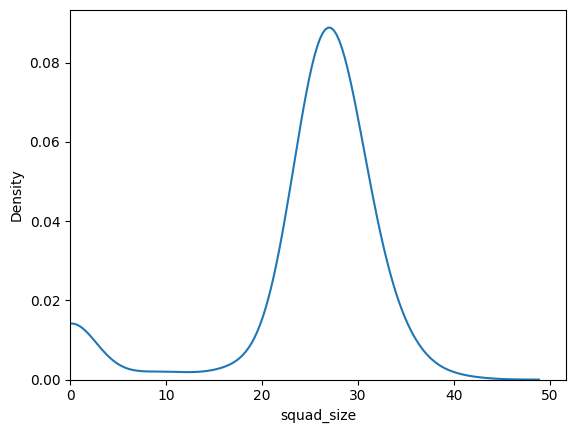

In [23]:
sns.distplot(df_club_v1["squad_size"], hist=False)
plt.pyplot.ylim(0,)
plt.pyplot.xlim(0,)

/tmp/ipykernel_37/1966147610.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_club_v1["squad_size"], hist=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='squad_size', ylabel='Density'>

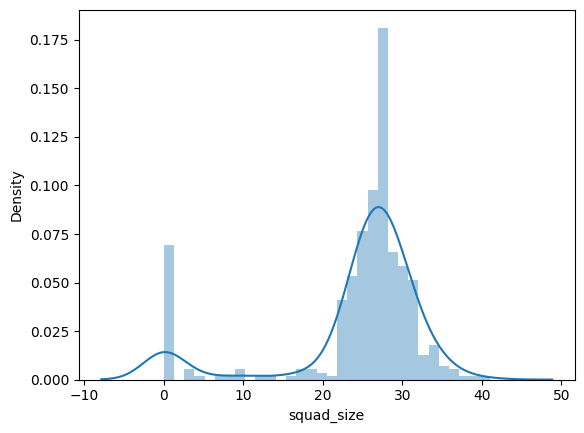

In [24]:
sns.distplot(df_club_v1["squad_size"], hist=True)

/tmp/ipykernel_37/452451448.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_club_v1["squad_size"], hist=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 51.69658897257098)

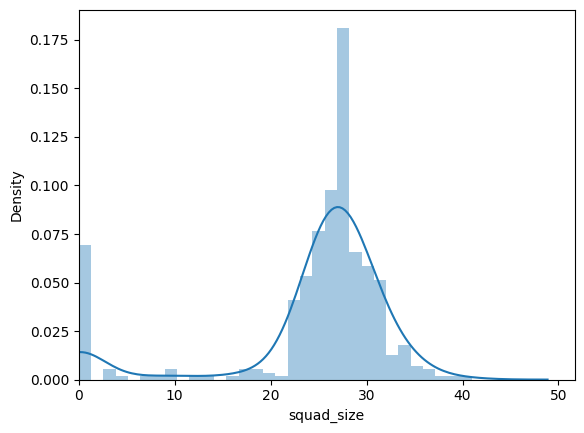

In [25]:
sns.distplot(df_club_v1["squad_size"], hist=True)
plt.pyplot.ylim(0,)
plt.pyplot.xlim(0,)

/tmp/ipykernel_37/958974550.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_club_v1["squad_size"], hist=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


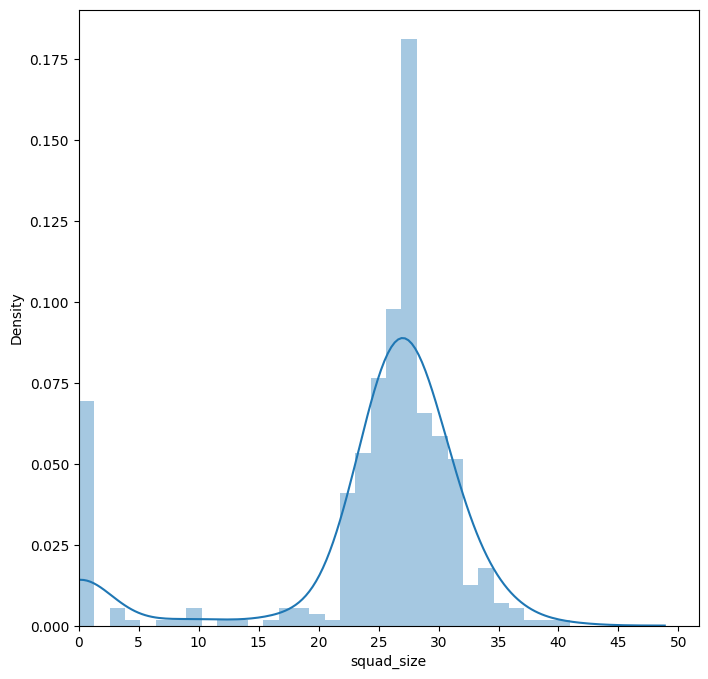

In [26]:
plt.pyplot.figure(figsize=(8,8))
sns.distplot(df_club_v1["squad_size"], hist=True)

plt.pyplot.ylim(0,)
plt.pyplot.xlim(0,)
plt.pyplot.xticks(np.linspace(0, 50, 11))


plt.pyplot.savefig("squad_size_histogram.png", dpi=300)

In [27]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(x=df_club_v1["foreigners_percentage"], y=df_club_v1["national_team_players"])
print("Pearson coefficient is equal: ", pearson_coef, "P-value is equal: ", p_value,".")

Pearson coefficient is equal:  nan P-value is equal:  nan .


In [28]:
print(df_club_v1["foreigners_percentage"].isna().sum())
print(df_club_v1["national_team_players"].isna().sum())

49
0


In [29]:
without_nan = df_club_v1.dropna(subset=["foreigners_percentage"], axis=0, inplace=False)
without_nan

,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,filename,url,net_transfer_record_value
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,27,25.6,13,48.1,1,Merck-Stadion am Böllenfalltor,17810,+€3.05m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...,NaN
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,30,26.5,11,36.7,3,Yekaterinburg Arena,23000,+€880k,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...,NaN
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,35,25.7,18,51.4,12,Tüpraş Stadyumu,42445,€-18.65m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...,€-18.65m
3,12,as-rom,Associazione Sportiva Roma,IT1,24,26.4,18,75.0,18,Olimpico di Roma,73261,€-64.10m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...,€-64.10m
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,25,25.2,18,72.0,16,Tottenham Hotspur Stadium,62850,€-93.55m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...,€-93.55m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,724,fc-volendam,FC Volendam,NL1,25,23.4,6,24.0,2,Kras Stadion,7384,+€800k,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-volendam/st...,+€800k
435,800,atalanta-bergamo,Atalanta Bergamasca Calcio S.p.a.,IT1,26,26.8,15,57.7,20,Gewiss Stadium,21747,+€18.05m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/atalanta-berga...,+€18.05m
436,85465,karpaty-lviv-2020-,FK Karpaty Lviv,UKR1,30,24.4,6,20.0,1,Ukraina,28051,€-1.48m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/karpaty-lviv-2...,€-1.48m
437,979,moreirense-fc,Moreirense Futebol Clube,PO1,24,25.8,16,66.7,3,Estádio C. J. de Almeida Freitas,6150,+€2.10m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/moreirense-fc/...,NaN


In [30]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(x=without_nan["foreigners_percentage"], y=without_nan["national_team_players"])
print("Pearson coefficient is equal: ", pearson_coef, "P-value is equal: ", p_value,".")

Pearson coefficient is equal:  0.6049453677068942 P-value is equal:  2.7189279905647523e-40 .


In [31]:
import sqlite3
conn = sqlite3.connect('FootballData.db')
without_nan.to_sql('FootballData.db', conn)

390